In [1]:
import numpy as np

def hypothesis(X, theta):
    return X @ theta.T

def cost_fn(X, y, theta):
    c = np.sum(np.power(X@theta.T-y,2))/(2*len(X))
    return c

def gradientDescent(X, y, theta, alpha, epochs):
    cost_list = np.zeros(epochs)

    for i in range(epochs):
        theta = theta-alpha*(1/len(X))*np.sum((X@theta.T-y)*X, axis=0)
        cost_list[i] = cost_fn(X, y, theta)

    return theta, cost_list

Get Final THETA :  [[0.01747131 0.19191127 0.00852    0.13105586 0.03399552 0.52229917
  0.0164647 ]]
Get Final COST :  0.1677096640432409


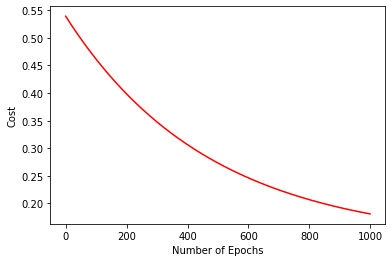

정답 : [-0.52266776] / 예측 결과 : [-0.2893424]
정답 : [-0.64511714] / 예측 결과 : [-0.54046254]
정답 : [-0.36722867] / 예측 결과 : [-0.19778896]
정답 : [-0.14999167] / 예측 결과 : [-0.15764011]
정답 : [2.08432557] / 예측 결과 : [0.99353883]
정답 : [0.0712316] / 예측 결과 : [-0.42016082]
정답 : [-0.80196474] / 예측 결과 : [-0.54906349]
정답 : [0.53902776] / 예측 결과 : [0.90943577]
정답 : [-0.84629262] / 예측 결과 : [-0.39120284]
정답 : [-0.04370391] / 예측 결과 : [0.17188825]
정답 : [-0.96105493] / 예측 결과 : [-0.6562043]
정답 : [-0.28836266] / 예측 결과 : [-0.09990368]
정답 : [-0.19226161] / 예측 결과 : [-0.18879196]
정답 : [-0.10248839] / 예측 결과 : [-0.20257824]
정답 : [0.05813647] / 예측 결과 : [0.0944507]
정답 : [-0.34069805] / 예측 결과 : [0.01242922]
정답 : [-0.20421831] / 예측 결과 : [-0.05892607]
정답 : [0.02856614] / 예측 결과 : [-0.1520247]
정답 : [-0.70114055] / 예측 결과 : [-0.40219671]
정답 : [-0.8736828] / 예측 결과 : [-0.55531118]


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

dataframe = pd.read_csv('./Data/insurance.csv')

dataframe = (dataframe - dataframe.mean())/dataframe.std()

X = dataframe.iloc[:,0:6]
X = np.concatenate((np.ones([X.shape[0], 1]), X), axis=1)

y = dataframe.iloc[:, 6:7].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
theta = np.zeros([1, len(X[0])])

learning_rate = 0.001
epochs = 1000

f_theta, cost_list = gradientDescent(X_train, y_train, theta, learning_rate, epochs)
print('Get Final THETA : ', f_theta)

f_cost = cost_fn(X, y, f_theta)
print('Get Final COST : ', f_cost)

plt.plot(np.arange(epochs), cost_list, 'r')
plt.xlabel('Number of Epochs')
plt.ylabel('Cost')
plt.show()

for i in range(20):
    h = hypothesis(X_test[i], f_theta)
    print('정답 : {} / 예측 결과 : {}'.format(y_test[i], h))